# Занятие 3
## Основы статистического анализа.

### Уточенения определений

**Генеральная совокупность** --- весь существующий набор значений для наших показателей.

**Выборка** --- случайно выбранная часть, содержащася в генеральной совокупности.


Параметры распределения генеральной совокупности -- точный ответ, выборки -- статистический ответ.

### Вспомним ЦПТ

$$\bar{X_n} \rightarrow^d \mathcal{N}(\mathbb{E}X_n,\frac{\mathbb{D}X_n}{n})$$

для $n \ge 30$

Далее используем следующее обозначение:

$$\mathbb{E}X_n = M, \ \mathbb{D}X_n = \sigma^2, \ SE = \frac{\sigma}{\sqrt{n}} =(\text{для выборок } n \ge 30) =  \frac{s}{\sqrt{n}}, $$ 

\begin{align}
\bar{X_n} &= \frac 1n \sum_{i=1}^n X_i - \text{выборочное среднее,} \\
s^2 &=  \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})^2  - \text{выборочная дисперсия,}\\
M &- \text{матожидание генеральной совокупности,} \\
\sigma &- \text{среднеквадратичное отклонение ген.совокупности,} \\
SE &- \textbf{стандартная ошибка средних}
\end{align}


Тогда ЦПТ примет вид:

$$\bar{X_n} \rightarrow^d \mathcal{N}(M,SE^2)$$

## Доверительные интервалы

#### Пример

Пусть был проведен опрос $n=64$ жителей возраста $[18,30]$ лет и измерено их уровень давления. 

Оказалось, что $\bar{X} = 100,\ \sigma = s = 4$

Как оценить настоящее среднее (если бы мы провели опрос всех жителей Земли возраста $[18,30]$?

#### Решение
- Правило двух сигм гласит, что в интервал $(\bar{X} - 2\sigma; \bar{X} + 2\sigma)$ попадает $\approx 95 \%$ выборки. 


- Используя ЦПТ, получаем, что наше распределение выборочных средних будет $\mathcal{N}(M, SE^2)$

- Посчитаем интервал $X_1 = (\bar{X} - 2SE; \bar{X} + 2SE)$. 

- В нем должно содержаться $95\%$ выборки, значит с $95\%$ вероятностью $M \in X_1$

Данный интервал называется **доверительным интервалом** уровня доверия $95\%$

### Как построить ДИ уровня доверия $99\%$ ?

Правило трех сигм гласит, что в интервал $(\bar{X} - 3\sigma; \bar{X} + 3\sigma)$ попадает $\approx 99 \%$ выборки. 


## Статистический вывод, p-value

#### Пример

$M=20$ --- средний расход топлива

Новую технологию опробовали на $n=64$ машинах и получили $\bar{X} = 18.5,\ s= 4$. 

С одной стороны, технология может действительно работать, тогда среднее значение должно уменьшиться. 

С другой --- это может быть просто выброс

### Гипотезы

$H_0 : M_{tech} = 20$

$H_1 : M_{tech} \ne 20$

$H_0$ --- гипотеза, что применяя новую технологию среднее значение останется прежним, 

$H_1$ --- гипотеза, что среднее изменится

### z-значение (отступление)

Любое распределение можно преобразовать в шкалу, где $M_z = 0$, a $D_z = 1$ 

$$z = \frac{X_i - \bar{X}}{\sigma}$$

Легко проверить, что такая случайная величина будет иметь среднее значение 0 и дисперсию 1.

#### Решение

Из ЦПТ имеем, что выборочные средние имеют распределение $\mathcal{N}(M, SE^2)$

$$SE = \frac{s}{\sqrt n} = \frac{4}{8} = \frac 12$$

$$z = \frac{\bar{X} - M}{SE} = \frac{18.5 - 20}{0.5} = -3$$


Получаем, что значение $\bar{X}$ отклоняется от $M$ на 3 сигмы! ($\mathcal{N}(0,1) \Rightarrow \sigma = 1)$.

Используем https://gallery.shinyapps.io/dist_calc/, для подсчета вероятности такого события.

**p - value** -- уровень значимости. 

В нашем примере $p = 0.003$

Принято считать, что при $p < 0.05$ гипотезу $H_0$ стоит отвергать, $p > 0.05$ -- $H_0$  **не отвергать**

### Статистические ошибки

- первого рода (верная гипотеза $H_0$ была отвергнута)
- второго рода (неверная гипотеза $H_0$ была принята)



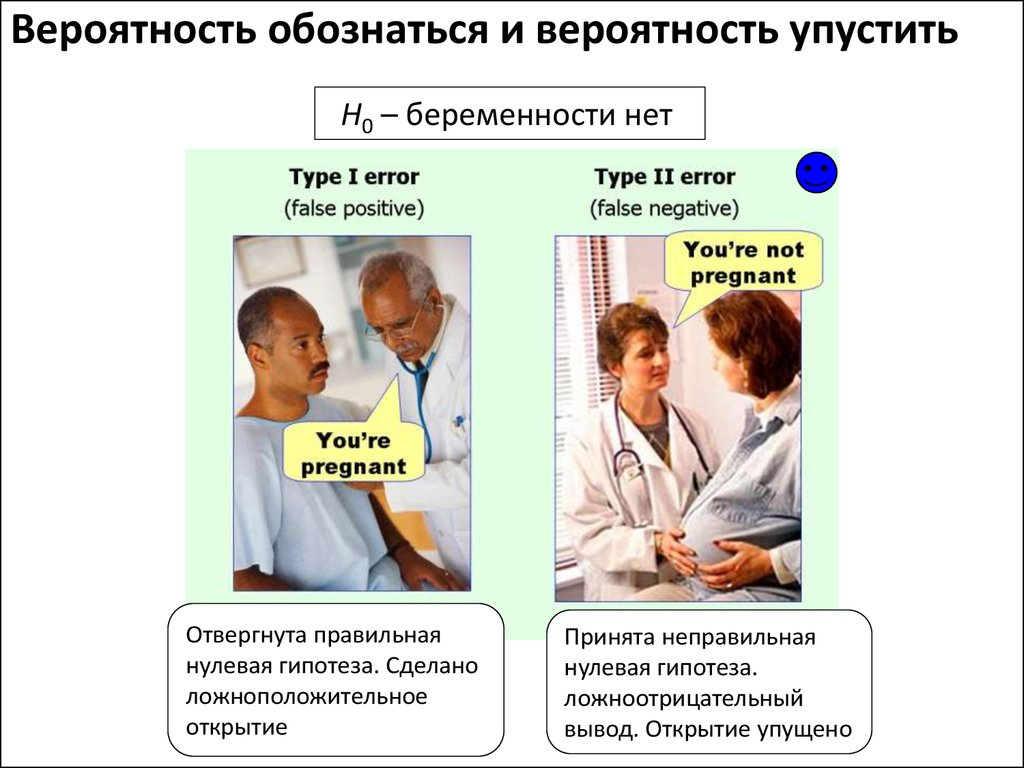

In [15]:
from IPython.display import Image
Image("pics/pregnant.jpg")

## Распределение Стьюдента

При $N \le 30$, ЦПТ работает плохо.

Рассмотрим распределение Стьюдента $T$ с параметром $df = n - 1$ -- степенью свободы.



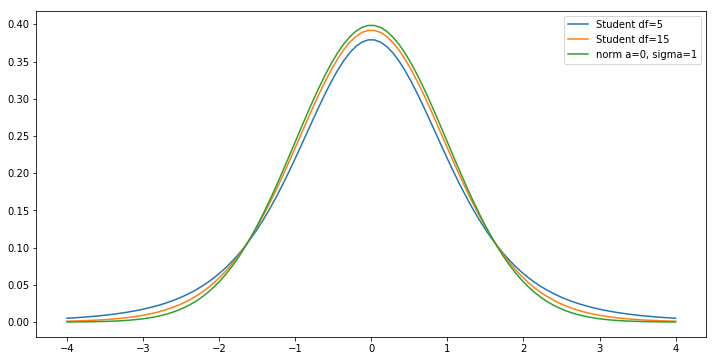

In [16]:
import scipy.stats as sts
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

t_rv = sts.t(5)
norm_rv = sts.norm(0, 1)
t_rv_2 = sts.t(15)
x = np.linspace(-4, 4, 100)

plt.figure(figsize=(12,6))

pdf = t_rv.pdf(x)
plt.plot(x, pdf)

pdf_2 = t_rv_2.pdf(x)
plt.plot(x, pdf_2)

pdf_norm = norm_rv.pdf(x)
plt.plot(x, pdf_norm)

plt.legend(['Student df=5', 'Student df=15', 'norm a=0, sigma=1'])

#### Пример

$n = 25, \bar{X} = 10.8, s = 2$

$$ H_0: M = 10$$

$$ H_1: M \ne 10$$

#### Решение

- Используя $z = \frac{\bar{X} - M}{SE}$, получим $z = 2 \Rightarrow p < 0.05$. Отвергаем гипотезу $H_0$
- Используя $t = \frac{\bar{X} - M}{SE}$, получим $t = 2.$ При $df = 24 \Rightarrow p > 0.05$. Не отвергаем гипотезу $H_0$

### T-test


#### Пример

$\bar{X}_1, s_1, n_1$

$\bar{X}_2, s_2, n_2$

$$ H_0: M_1 = M_2$$

$$ H_1: M_1 \ne M_2$$



#### Решение

- При верной гипотезе $H_0$ распределение будет иметь вид распределения Стьюдента со следующими параметрами:

$$SE = \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}$$

$$df = n_1 + n_2 - 2$$


$$t = \dfrac{(\bar{X_1} - \bar{X_2}) - (M_1 - M_2)}{ \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} = \dfrac{\bar{X_1} - \bar{X_2}}{ \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $$

### Корреляция

**Корреляция** --- это статистическая взаимосвязь двух или более
случайных величин. При этом изменения значений одной или
нескольких из этих величин сопутствуют систематическому изменению
значений другой или других величин.

$$cov_{xy}= \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{N - 1}$$

$$ r_{xy} = \frac{cov_{xy} }{\sigma_x \sigma_y} = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \sum(Y_i - \bar{Y})^2}} \in [-1, 1]$$

где $cov_{xy}$ --- ковариация случайных величин $X$ и $Y$, $r_{xy}$ -- их коэффициент корреляции

#### Визуализация

https://rpsychologist.com/d3/correlation/